In [2]:
#--------------------------------#
# DIGITAL IMAGE PROCESSING       #
# Author: Nguyễn Văn Quang Duy   #
# ID: 23110086                   #
# Date: 04/11/2025               #
#--------------------------------#
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc hình ảnh
raw_img = cv2.imread("pictures/ex1.jpg")

# Transform ảnh BRG sang ảnh Gray-Scale
gray_img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2GRAY)

# Transform ảnh Gray-Scale sang ảnh nhị phân
_, bin_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)


In [3]:
#Xuất ảnh gray-scale và nhị phân
cv2.imwrite("pictures/output_gray.jpg", gray_img)
cv2.imwrite("pictures/output_binary.jpg", bin_img)

True

Ở đây có dấu _ đóng vai trò là một placeholder bởi vì cv2.threshold trả về 2 giá trị mà ta chỉ quan tâm đến giá trị thứ 2 thôi
| Nếu giá trị pixel | Kết quả               |
| ----------------- | --------------------- |
| `< 127`           | gán = **0** (đen)     |
| `>= 127`          | gán = **255** (trắng) |
Như vậy, chỉ còn 2 giá trị là 0 (đen) hoặc 255 (trắng)

# Bài tập 1
Xuất ra 3 hình ảnh: gốc, gray-scale, nhị phân

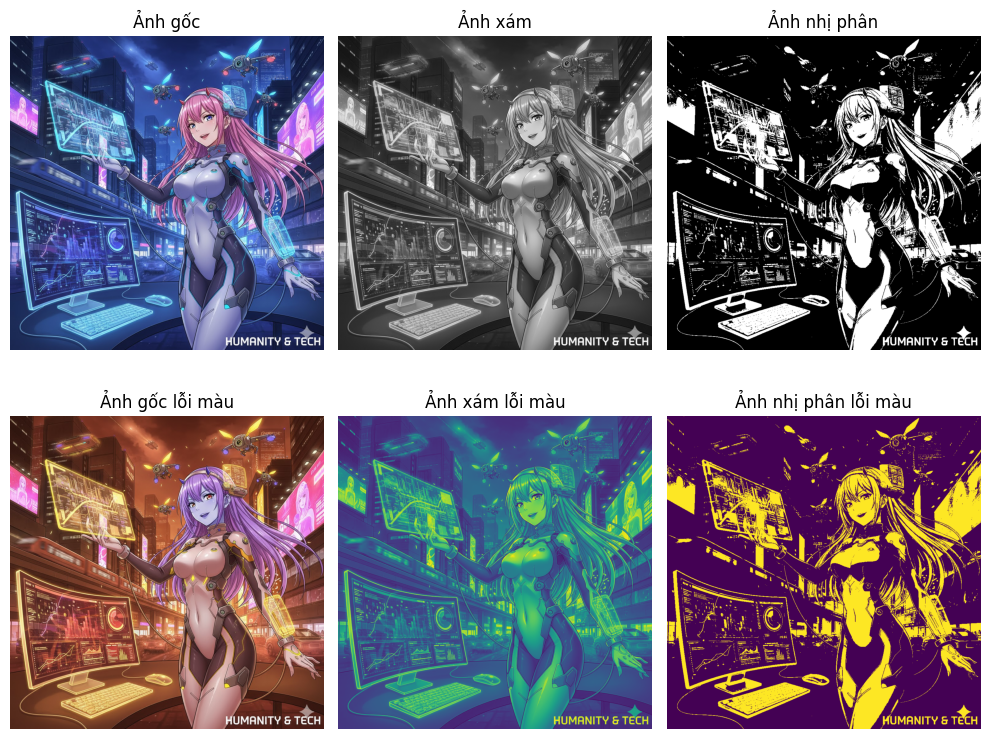

In [4]:
plt.figure(figsize=(10,8))

plt.subplot(2,3,1)
# Phải chuyển từ BRG sang RGB vì OpenCV đọc ảnh theo thứ tự màu BRG
# còn Matplotlib đọc ảnh theo thứ tự RGB
# Ảnh thứ 2 là ảnh lỗi màu nếu không chuyển
plt.imshow(cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB))
plt.title("Ảnh gốc")
plt.axis("off")

plt.subplot(2,3,4)
plt.imshow(raw_img)
plt.title("Ảnh gốc lỗi màu")
plt.axis("off")

plt.subplot(2,3,5)
# Ta có thêm thuộc tính cmap='gray' để chỉ định cho matplotlib hiểu là
# chỉ sử dụng kênh xám, nếu không nó sẽ mặc định dùng colormap
# viridis (xanh - vàng - tím)
plt.imshow(gray_img)
plt.title("Ảnh xám lỗi màu")
plt.axis("off")

plt.subplot(2,3,2)
# Trường hợp có cmap='gray
plt.imshow(gray_img, cmap='gray')
plt.title("Ảnh xám")
plt.axis("off")

plt.subplot(2,3,3)
plt.imshow(bin_img, cmap='gray')
plt.title("Ảnh nhị phân")
plt.axis("off")

plt.subplot(2,3,6)
plt.imshow(bin_img)
plt.title("Ảnh nhị phân lỗi màu")
plt.axis("off")

plt.tight_layout()
plt.show()

# Bài tập 2
Sử dụng các phương pháp làm mờ gồm: làm mờ trung bình, làm mờ trung vị, làm mờ Gaussian và hiển thị ảnh gốc để so sánh.
Mục đích của việc làm mờ là để xử lý ảnh nhằm:
- Giảm nhiễu
- Làm mượt ảnh trước khi xử lý nâng cao. Trước khi áp dụng Canny, Sobel,... thì ta thường làm mờ trước để giảm ảnh hưởng của nhiễu
- Giảm chi tiết nhỏ để tăng cường nhận diện vật thể lớn, làm nổi bật biên, giảm răng cưa...

| Phương pháp       | Cách hoạt động                                             | Ưu điểm                                               | Nhược điểm                                 | Khi nào dùng                           |
| ----------------- | ---------------------------------------------------------- | ----------------------------------------------------- | ------------------------------------------ | -------------------------------------- |
| **Average Blur**  | Lấy **trung bình** của các pixel trong kernel              | Đơn giản, nhanh                                       | Làm mờ mạnh, có thể làm mất chi tiết       | Làm mượt nhẹ, giảm noise đều           |
| **Median Blur**   | Lấy **giá trị trung vị** (median) trong kernel             | Rất tốt cho **nhiễu muối tiêu**, bảo toàn biên tốt    | Chậm hơn, không phù hợp ảnh nhiễu Gaussian | Xử lý nhiễu muối tiêu, ảnh fingerprint |
| **Gaussian Blur** | Áp kernel Gaussian (trọng số lớn ở giữa, nhỏ dần ra ngoài) | Mượt tự nhiên, bảo toàn chi tiết tốt, dùng nhiều nhất | Tốn tính toán hơn Average                  | Tiền xử lý cho Canny, làm mờ tự nhiên, phổ biến hơn  |


In [5]:
average_blur = cv2.blur(raw_img, (5,5))
median_blur = cv2.medianBlur(raw_img, 5)
gauss_blur = cv2.GaussianBlur(raw_img, (5,5), 0)

# Dùng cho ảnh Gray-Scale
average_blur_gray = cv2.blur(gray_img, (5,5))
median_blur_gray = cv2.medianBlur(gray_img, 5)
gauss_blur_gray = cv2.GaussianBlur(gray_img, (5,5), 0)

Số 5 xuất hiện nhiều trong các dòng code trên biểu thị cho kernal size, tham số này luôn phải là số lẻ. Tại vì kernel phải là một số lẻ để có một **pixel trung tâm**
Ví dụ kernel 5x5: <br>
x x x x x <br>
x x x x x <br>
x x O x x  ← pixel trung tâm <br>
x x x x x <br>
x x x x x <br>
Số kernel càng tăng thì mức độ làm mờ cũng sẽ tăng theo.
## Tại sao phải có một pixel trung tâm ?
Khi thực hiện Gaussian blur, Median blur, Sobel,... tất cả đều dùng kernel.<br>
Convolution sẽ tính toán dựa trên các pixel xung quanh để tạo ra giá trị mới cho pixel ở trung tâm.<br>
Nếu không có pixel trung tâm thì giá trị gán sẽ bị vô nghĩa. Khi kernel được đặt lên ảnh, ta phải biết:<br><center>**Giá trị mới sẽ gán cho pixel nào ?**</center><br>
Nguyên tắc của phép lọc: 
$$Pixel mới = \sum{kernel[i,j] × pixel lân cận}$$
Nhưng pixel mới phải được gán cho 1 vị trí cụ thể.<br>
→ Nếu không có tâm → không biết gán vào đâu → phép lọc không hợp lệ.
### Tính đối xứng của kernel
Đặc biệt với Gaussian kernel:
- Kernel phải đối xứng qua tâm
- Giá trị lớn nhất nằm ở giữa
- Nhỏ dần về phía ngoài theo phân phối chuông

Nếu không có tâm, kernel không thể:<br>
- Đối xứng <br>
- Có giá trị lớn nhất ở giữa <br>
- Ap dụng đúng công thức Gaussian <br>
## Sigma
```
cv2.GaussianBlur(raw_img, (5,5), 0)
```
Trong dòng code này có số 0 là tham số sigma.<br>
Gaussian blur làm mờ theo phân phối Gaussian (chuông):
$$G(x,y) = \frac{1}{2\pi\sigma^2}e^{-\frac{x^2+y^2}{2\sigma^2}}$$
Trong đó, độ lớn của sigma quyết định cường độ mờ, càng lớn thì càng mờ.<br>
Để đơn giản thì người dùng chỉ cần cho tham số này là 0, còn việc tính thì cứ để OpenCV lo **( •̀ ω •́ )y**
## Kết luận cho phần này
Kernel phải có tâm vì:
- Ta cần vị trí để gán giá trị mới <br>
- Kernel phải đối xứng quanh tâm<br>
- Mọi phép lọc trong xử lý ảnh dựa trên pixel lân cận → pixel tâm là nơi nhận kết quả<br>
- Nếu kernel chẵn, ta không xác định được tâm → phép lọc bị mâu thuẫn toán học


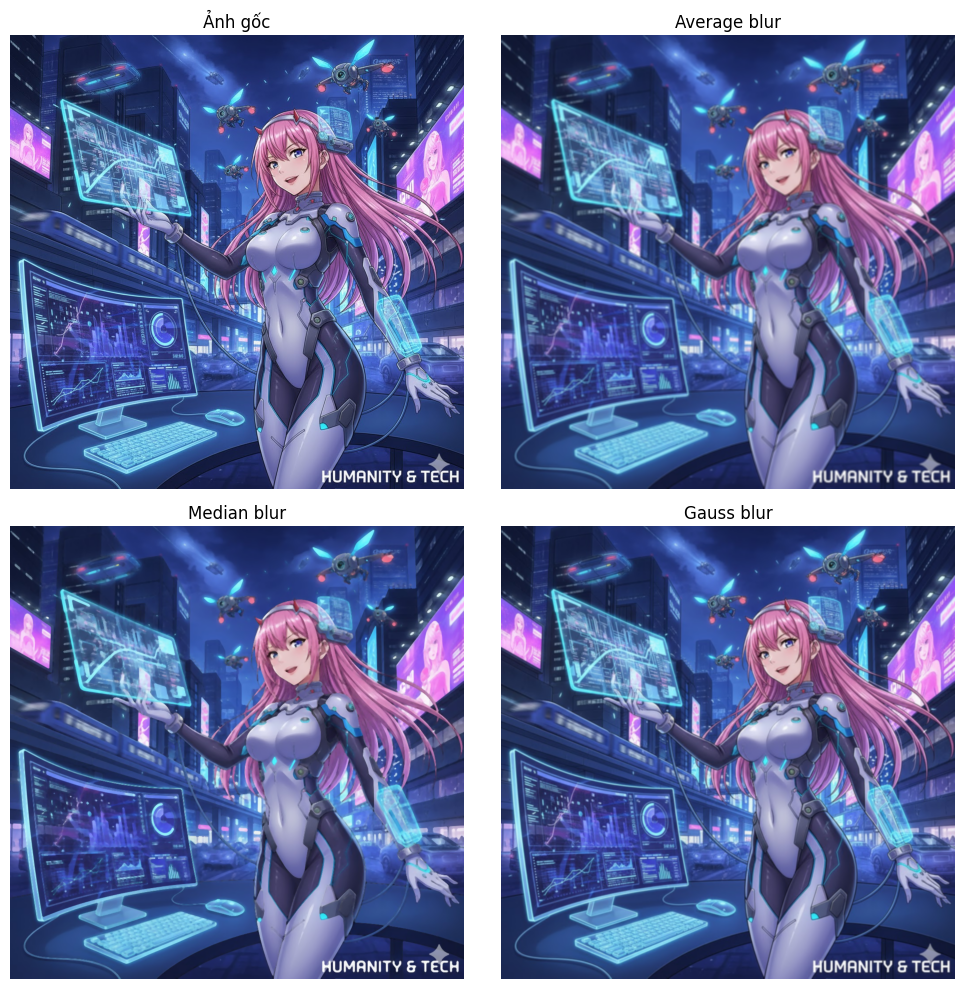

In [6]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB))
plt.title("Ảnh gốc")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(cv2.cvtColor(average_blur, cv2.COLOR_BGR2RGB))
plt.title("Average blur")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB))
plt.title("Median blur")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(cv2.cvtColor(gauss_blur, cv2.COLOR_BGR2RGB))
plt.title("Gauss blur")
plt.axis("off")

plt.tight_layout()
plt.show()

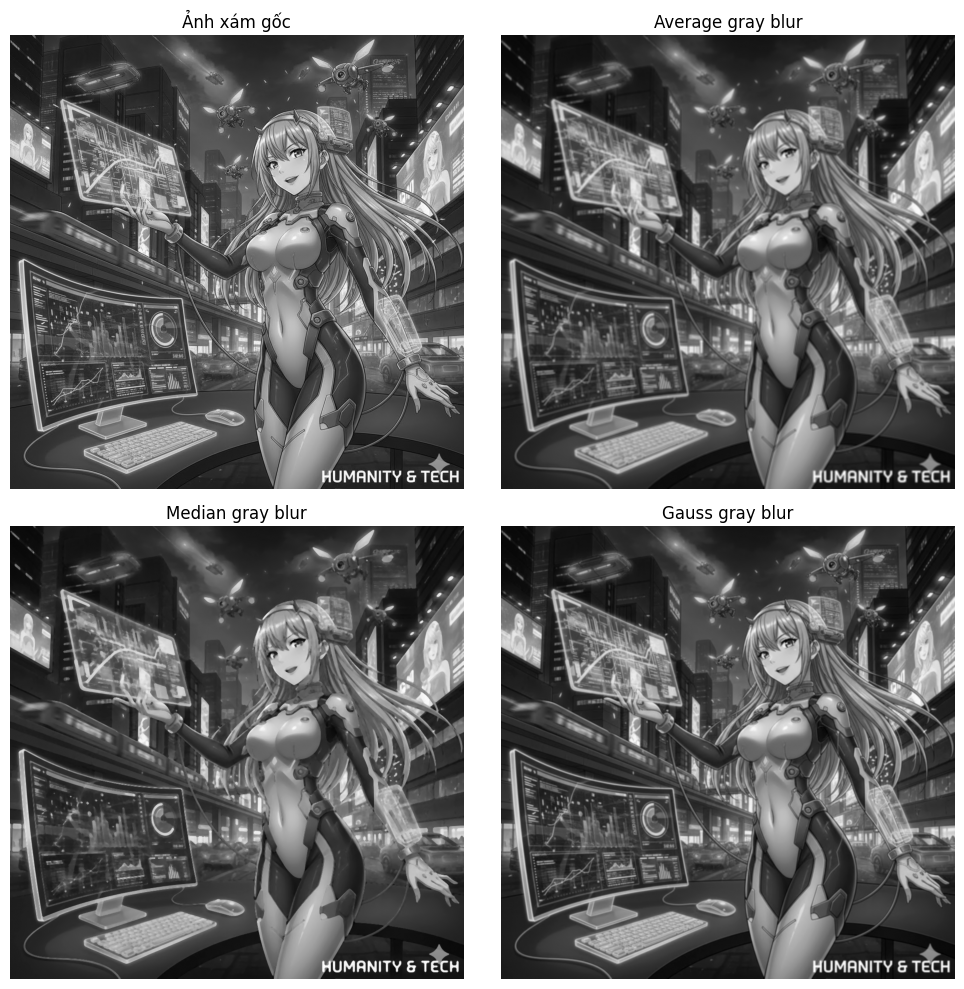

In [7]:
# Thử thao tác với ảnh Gray-Scale
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.imshow(gray_img, cmap='gray')
plt.title("Ảnh xám gốc")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(average_blur_gray, cmap='gray')
plt.title("Average gray blur")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(median_blur_gray, cmap='gray')
plt.title("Median gray blur")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(gauss_blur_gray, cmap='gray')
plt.title("Gauss gray blur")
plt.axis("off")

plt.tight_layout()
plt.show()

# Bài tập 3
Sử dụng Canny để phát hiện biên<br>
Cách Canny hoạt động (ngắn gọn):
- Làm mờ ảnh để giảm nhiễu.
- Tính gradient (độ thay đổi sáng) bằng Sobel.
- Pixel nào có gradient > 200 → chắc chắn là biên.
- Pixel nào gradient nằm trong [100, 200] → được giữ nếu liên kết với biên mạnh.
- Pixel nào gradient < 100 → loại bỏ. 


In [8]:
edges = cv2.Canny(gray_img, 100, 200)

#nếu đầu vào là một ảnh nhị phân
edges_bin = cv2.Canny(bin_img, 100, 200)

# Đã qua bước làm mờ Gaussian
edges_gaussian = cv2.Canny(gauss_blur_gray, 100, 200)

Ý nghĩa các tham số:
- gray: ảnh xám đầu vào.
- 100: ngưỡng dưới (threshold1)
- 200: ngưỡng trên (threshold2)

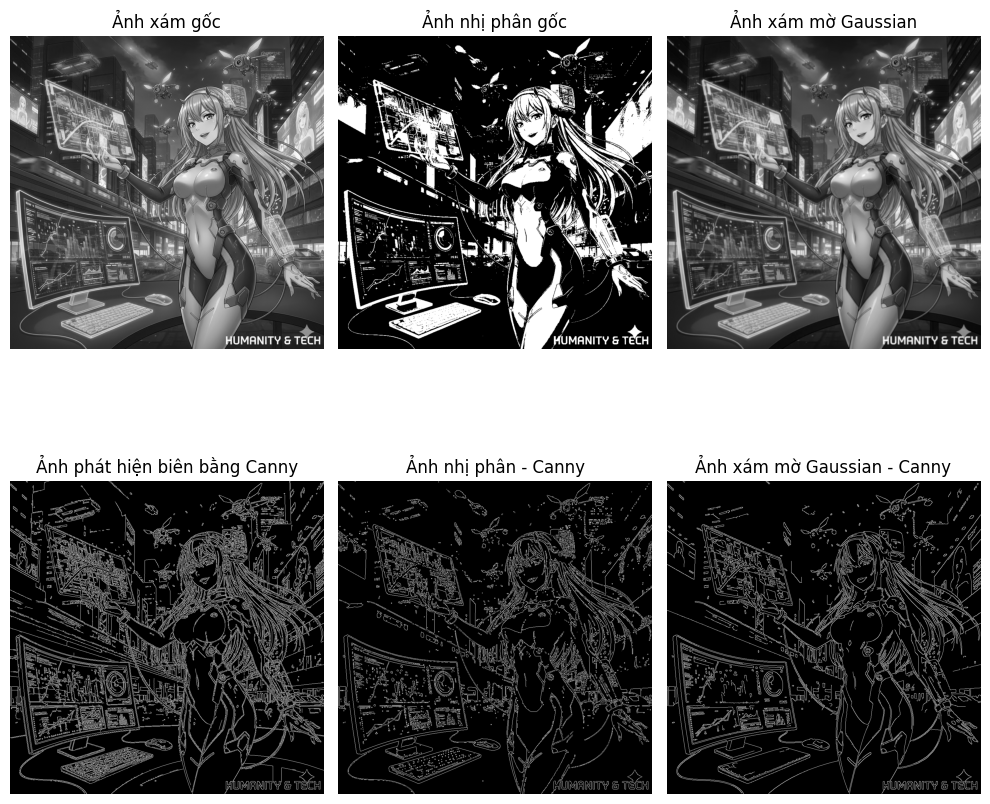

In [9]:
plt.figure(figsize=(10,10))

plt.subplot(2,3,1)
plt.imshow(gray_img, cmap='gray')
plt.title("Ảnh xám gốc")
plt.axis("off")

plt.subplot(2,3,4)
plt.imshow(edges, cmap='gray')
plt.title("Ảnh phát hiện biên bằng Canny")
plt.axis("off")

plt.subplot(2,3,2)
plt.imshow(bin_img, cmap='gray')
plt.title("Ảnh nhị phân gốc")
plt.axis("off")

plt.subplot(2,3,5)
plt.imshow(edges_bin, cmap='gray')
plt.title("Ảnh nhị phân - Canny")
plt.axis("off")

plt.subplot(2,3,3)
plt.imshow(gauss_blur_gray, cmap='gray')
plt.title("Ảnh xám mờ Gaussian")
plt.axis("off")

plt.subplot(2,3,6)
plt.imshow(edges_gaussian, cmap='gray')
plt.title("Ảnh xám mờ Gaussian - Canny")
plt.axis("off")

plt.tight_layout()
plt.show()

Để sử dụng Canny phát hiện biên độ thì ảnh đầu vào phải là ảnh xám hoặc ảnh nhị phân.
> Canny hoạt động dựa trên gradient độ sáng, không phải màu

Quy trình xử lý của Canny gồm 4 bước:
1. Làm mờ Gaussian
2. Tính gradient theo Sobel (Gx,Gy)
3. Tính độ lớn gradient
4. Non-max suppresion + threshold

Trong đó gradient chỉ có nghĩa trên độ sáng (intensity), không có nghĩa trên màu.<br>
Vì vậy Canny cần 1 kênh duy nhất biểu diễn cường độ sáng để tính biến thiên sáng-tối. Nếu sử dụng BGR sẽ xuất hiện hiện tượng biên giả, pixel bên phải sáng hơn ở kênh Blue nhưng pixel bên trái sáng hơn ở kênh Red -> nhiễu biên.

Như đã đề cập trước đó là việc làm mờ Gaussian là tiền xử lý để đưa vào Canny. Ta có thể thấy rằng *ảnh xám gốc* sau khi qua Canny xử lý và *ảnh xám mờ Gaussian - Canny* sau khi qua Canny xử lý thì ảnh xám mờ Gaussian cho ra kết quả mượt hơn, không bị rối mắt và chi chít như bên ảnh xám gốc. Điều này sẽ làm ổn định → giúp contour detection, Hough, segmentation tốt hơn.

# Bài tập 4
Cắt ảnh (Crop) và thay đổi kích thước ảnh (resize)

In [20]:
crop_img = raw_img[100:350, 350:800]
resize_img= cv2.resize(raw_img, (500,500))

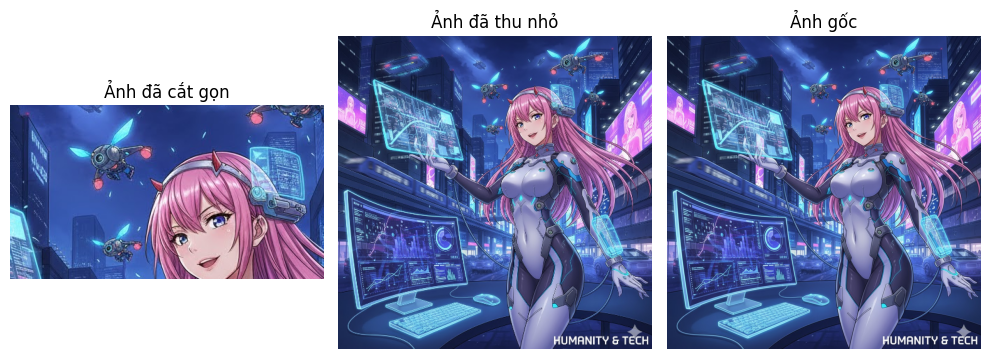

Ảnh gốc: (1024, 1024, 3)
Ảnh đã thu nhỏ: (500, 500, 3)
Ảnh đã cắt: (250, 450, 3)


In [21]:
plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB))
plt.title("Ảnh đã cắt gọn")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(resize_img, cv2.COLOR_BGR2RGB))
plt.title("Ảnh đã thu nhỏ")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB))
plt.title("Ảnh gốc")
plt.axis("off")

plt.tight_layout()
plt.show()

print("Ảnh gốc:", raw_img.shape)
print("Ảnh đã thu nhỏ:", resize_img.shape)
print("Ảnh đã cắt:", crop_img.shape)

Nếu không biết làm sao để lấy được chỗ muốn crop thì mở một file .py và chạy ```plt.imshow(<tên image>)```. Di chuyển con trỏ chuột sẽ hiển thị tọa độ của từng pixel.